Date: 3-July-2017.

This Notebook is for capstone project.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.cross_validation import train_test_split

#models
import xgboost as xgb

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)



C:\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [3]:
# Reading macro.csv

macro_df = pd.read_csv("input/macro.csv")
macro_df.head()

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,eurrub,brent,net_capital_export,gdp_annual,gdp_annual_growth,average_provision_of_build_contract,average_provision_of_build_contract_moscow,rts,micex,micex_rgbi_tr,micex_cbi_tr,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,grp,grp_growth,income_per_cap,real_dispos_income_per_cap_growth,salary,salary_growth,fixed_basket,retail_trade_turnover,retail_trade_turnover_per_cap,retail_trade_turnover_growth,labor_force,unemployment,employment,invest_fixed_capital_per_cap,invest_fixed_assets,profitable_enterpr_share,unprofitable_enterpr_share,share_own_revenues,overdue_wages_per_cap,fin_res_per_cap,marriages_per_1000_cap,divorce_rate,construction_value,invest_fixed_assets_phys,pop_natural_increase,pop_migration,pop_total_inc,childbirth,mortality,housing_fund_sqm,lodging_sqm_per_cap,water_pipes_share,baths_share,sewerage_share,gas_share,hot_water_share,electric_stove_share,heating_share,old_house_share,average_life_exp,infant_mortarity_per_1000_cap,perinatal_mort_per_1000_cap,incidence_population,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,provision_retail_space_sqm,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,NaN,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,63932.0,732.760604,0.716,0.284,0.962915,12865.0,233.351529,8.0,3.9,553874.9,95.8,-0.3,14.1,13.8,10.7,11.0,216.0,18.715883,99.9,99.8,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,"45,713",1356.112607,NaN,NaN,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
1,2010-01-02,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,175.15,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,63932.0,732.760604,0.716,0.284,0.962915,12865.0,233.351529,8.0,3.9,553874.9,95.8,-0.3,14.1,13.8,10.7,11.0,216.0,18.715883,99.9,99.8,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,"45,713",1356.112607,NaN,NaN,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2,2010-01-03,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,178.66,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,63932.0,732.760604,0.716,0.284,0.962915,12865.0,233.351529,8.0,3.9,553874.9,95.8,-0.3,14.1,13.8,10.7,11.0,216.0,18.715883,99.9,99.8,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,"45,713",1356.112607,NaN,NaN,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
3,2010-01-04,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.905,43.4054,80.12,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,183.44,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,63932.0,732.760604,0.716,0.284,0.962915,12865.0,233.351529,8.0,3.9,553874.9,95.8,-0.3,14.1,13.8,10.7,11.0,216.0,18.715883,99.

Not sure how to use macro, but it looks to have important data.

In [4]:
# Import train data into train_df

train_df = pd.read_csv("input/train.csv")
print (train_df.shape)
train_df.head(n=5)

(30471, 292)


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [5]:
column_count = train_df.count()
print ("Number of columns", column_count)


Number of columns id                                       30471
timestamp                                30471
full_sq                                  30471
life_sq                                  24088
floor                                    30304
max_floor                                20899
material                                 20899
build_year                               16866
num_room                                 20899
kitch_sq                                 20899
state                                    16912
product_type                             30471
sub_area                                 30471
area_m                                   30471
raion_popul                              30471
green_zone_part                          30471
indust_part                              30471
children_preschool                       30471
preschool_quota                          23783
preschool_education_centers_raion        30471
children_school                          3

## Data Preprocessing


----------


The data set is very extensive with 292 features and about 30,000 samples.
Also, few data points are missing in few features.

kk

In [6]:
# Checking the data type of the columns

train_df = pd.read_csv("input/train.csv", parse_dates= ["timestamp"])
datatype_df = train_df.dtypes.reset_index()
datatype_df.columns = ["Column", "ColumnType"]
datatype_df.groupby("ColumnType").aggregate('count').reset_index()

,ColumnType,Column
0,int64,157
1,datetime64[ns],1
2,float64,119
3,object,15


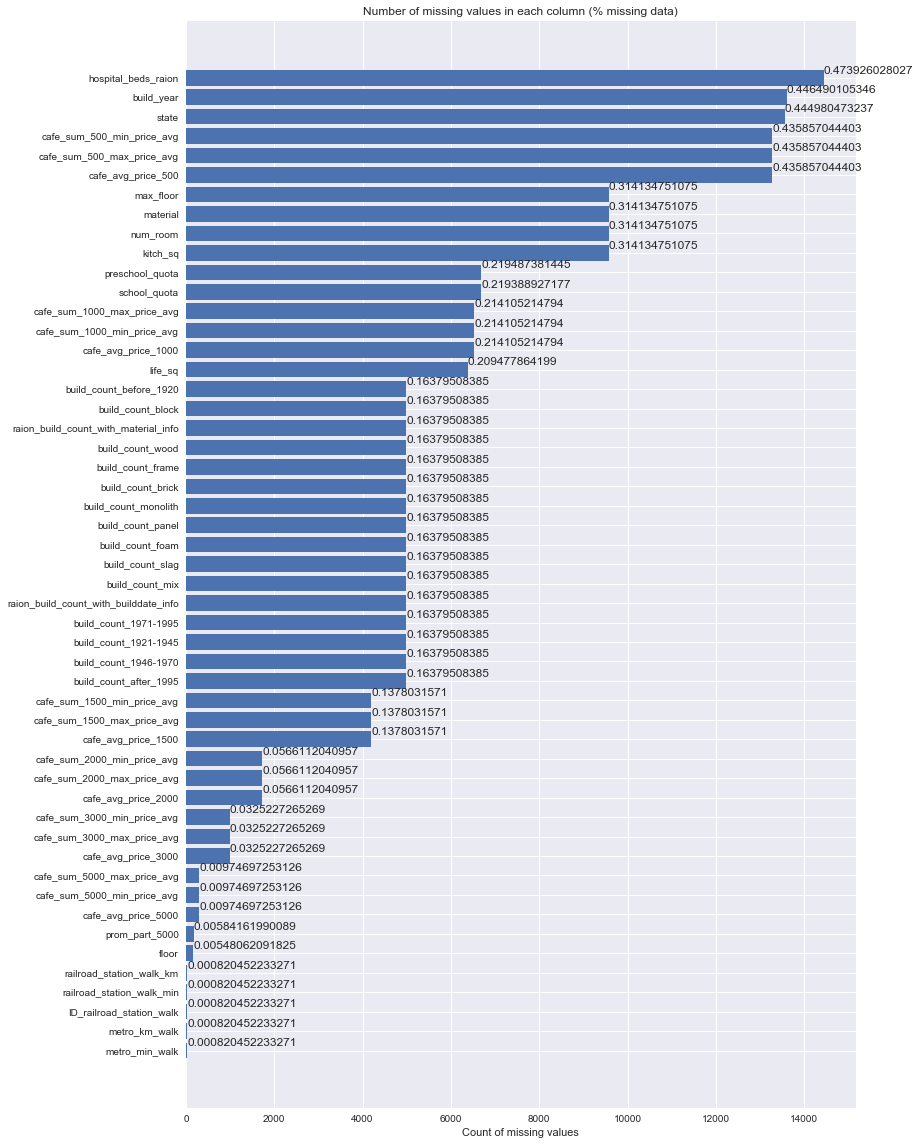

In [7]:
# Checking the Missing data

missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ["name", "missing_count"]
missing_df = missing_df.loc[missing_df.missing_count > 0]
missing_df = missing_df.sort_values(by="missing_count", ascending = 1)
index = np.arange(missing_df.shape[0])

fig, ax = plt.subplots(figsize = (12,20))
ax.barh(index, missing_df.missing_count)
ax.set_yticks(index)
ax.set_yticklabels(missing_df.name.values)
for i,v in enumerate(missing_df.missing_count):
    ax.text(v+3, i+0.25, str(v/train_df.shape[0]))
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column (% missing data)")
plt.show()



## Data Corrections:
Based on the suggestions from the discussion forums there are few changes in the data:

To do: move this section after further analysis

In [8]:
train_df["state"].loc[train_df.state > 4]

10089    33.0
Name: state, dtype: float64

## Feature exploration:

After a brief exploration of all features explained in the data dictionary, the data can be classified into 
 1. Housing Characteristics
 2. Demographic Characterisitics
 3. School Characteristics
 4. Cultural/Recreational Characteristics
 5. Infrastructure Features

In [9]:
 list(train_df.columns)

['id',
 'timestamp',
 'full_sq',
 'life_sq',
 'floor',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'product_type',
 'sub_area',
 'area_m',
 'raion_popul',
 'green_zone_part',
 'indust_part',
 'children_preschool',
 'preschool_quota',
 'preschool_education_centers_raion',
 'children_school',
 'school_quota',
 'school_education_centers_raion',
 'school_education_centers_top_20_raion',
 'hospital_beds_raion',
 'healthcare_centers_raion',
 'university_top_20_raion',
 'sport_objects_raion',
 'additional_education_raion',
 'culture_objects_top_25',
 'culture_objects_top_25_raion',
 'shopping_centers_raion',
 'office_raion',
 'thermal_power_plant_raion',
 'incineration_raion',
 'oil_chemistry_raion',
 'radiation_raion',
 'railroad_terminal_raion',
 'big_market_raion',
 'nuclear_reactor_raion',
 'detention_facility_raion',
 'full_all',
 'male_f',
 'female_f',
 'young_all',
 'young_male',
 'young_female',
 'work_all',
 'work_male',
 'work_female',
 'ekder_all'

 ## Housing Characteristics:
 
 Features include: 
 
- price_doc: sale price (this is the target variable)
- id: transaction id
- timestamp: date of transaction
- full_sq: total area in square meters, including loggias, balconies and other non-residential areas
- life_sq: living area in square meters, excluding loggias, balconies and other non-residential areas
- floor: for apartments, floor of the building
- max_floor: number of floors in the building
- material: wall material
- build_year: year built
- num_room: number of living rooms
- kitch_sq: kitchen area
- state: apartment condition
- product_type: owner-occupier purchase or investment
- sub_area: name of the district

C:\Continuum\Anaconda3\lib\site-packages\seaborn\matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
C:\Continuum\Anaconda3\lib\site-packages\seaborn\matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


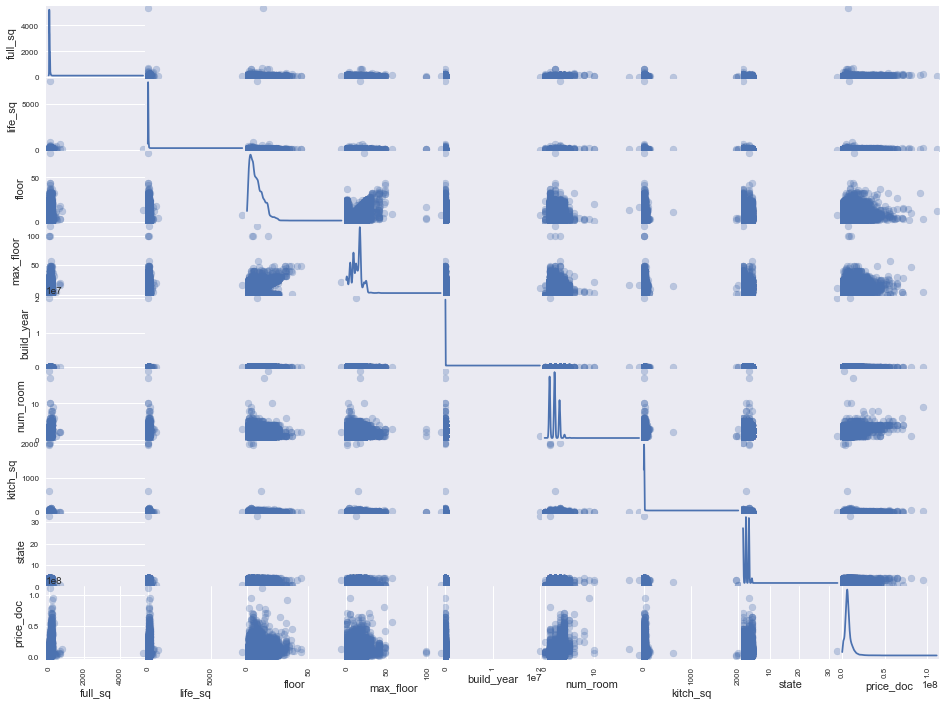

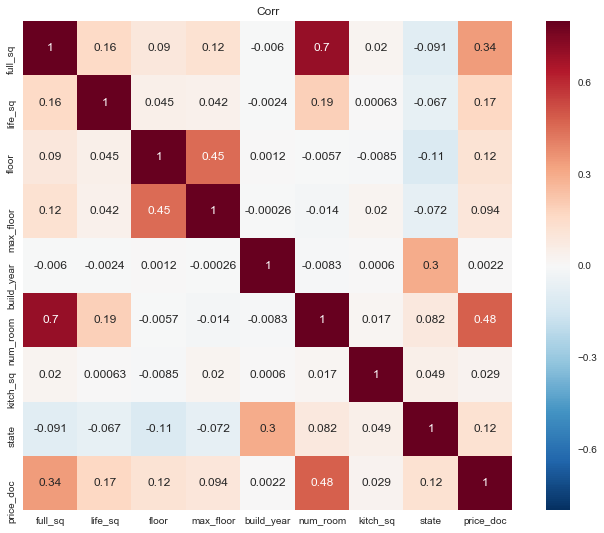

In [10]:
internal_char = train_df[['full_sq', 'life_sq', 'floor', 'max_floor', 'build_year',
                          'num_room', 'kitch_sq', 'state', 'price_doc']]

log_internal_char = np.log(internal_char+1)
corrmat_internal = internal_char.corr()
log_corrmat_internal = log_internal_char.corr()

# Produce a scatter matrix for each pair of features in the data

pd.scatter_matrix(internal_char, alpha = 0.3, figsize = (16,12), diagonal = 'kde', marker= 'o');
# log transformed
#pd.scatter_matrix(log_internal_char, alpha = 0.3, figsize = (16,12), diagonal = 'kde', marker= 'o');

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))
#f1, ax1 = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat_internal, vmax=.8, square=True, annot=True, ax = ax);
ax.set_title('Corr')
#sns.heatmap(log_corrmat_internal, vmax=.8, square=True, ax = ax1);
#ax1.set_title('Log Corr')
plt.show()

## Demographic Characteristics

Features include:

- 'area_m' 
- 'raion_popul' 
- 'full_all' 
- 'male_f' 
- 'female_f' 
- 'young_all' 
- 'young_female' 
- 'work_all' 
- 'work_male' 
- 'work_female' 
- 'price_doc'

C:\Continuum\Anaconda3\lib\site-packages\seaborn\matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
C:\Continuum\Anaconda3\lib\site-packages\seaborn\matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


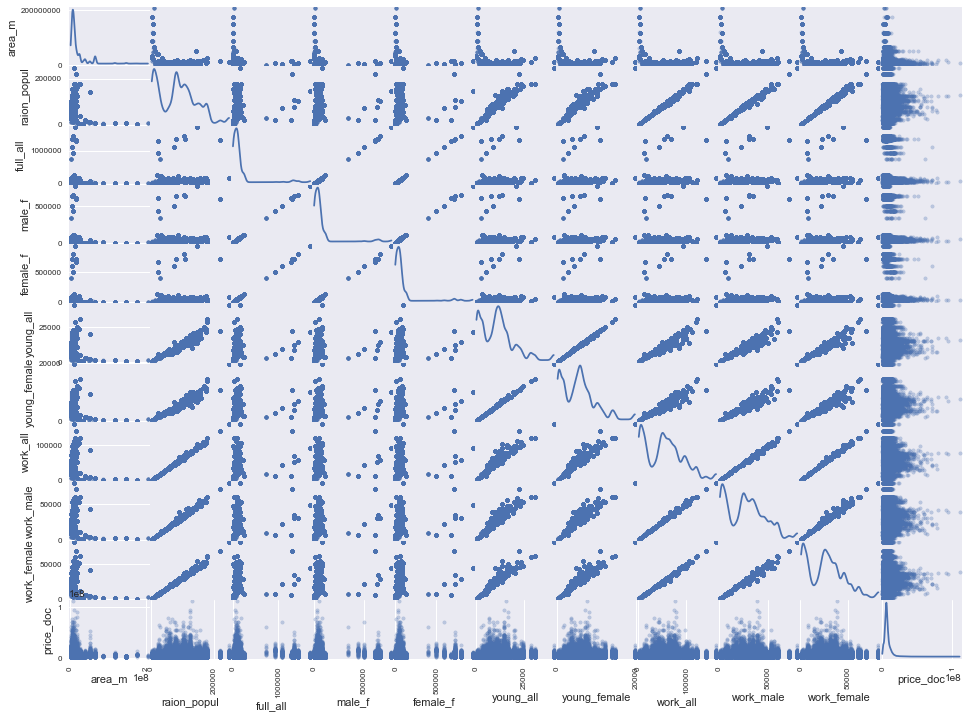

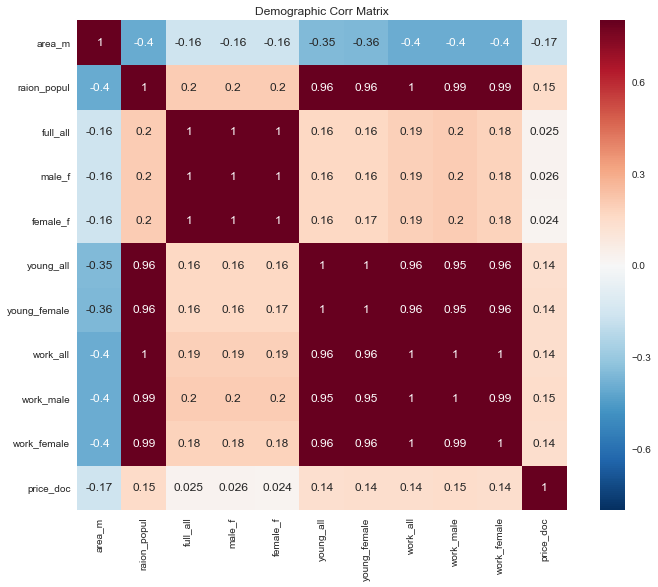

In [11]:
dgraph_char = train_df[['area_m', 'raion_popul', 'full_all', 'male_f', 'female_f', 'young_all', 
               'young_female', 'work_all', 'work_male', 'work_female', 'price_doc']]

corrmat_dgraph = dgraph_char.corr()

# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(dgraph_char, alpha = 0.3, figsize = (16,12), diagonal = 'kde');

# Create  a matplotlib figure for correlation plot
f2, ax2 = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat_dgraph, vmax=.8, square=True,annot=True, ax = ax2);
ax2.set_title('Demographic Corr Matrix')
plt.show()

## Education Environment Characterstics:

Features include:

- children_preschool 
- preschool_quota  
- preschool_education_centers_raion
- children_school 
- school_quota 
- school_education_centers_raion 
- school_education_centers_top_20_raion  
- university_top_20_raion 
- additional_education_raion 
- additional_education_km  
- university_km 
- price_doc 

C:\Continuum\Anaconda3\lib\site-packages\seaborn\matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
C:\Continuum\Anaconda3\lib\site-packages\seaborn\matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


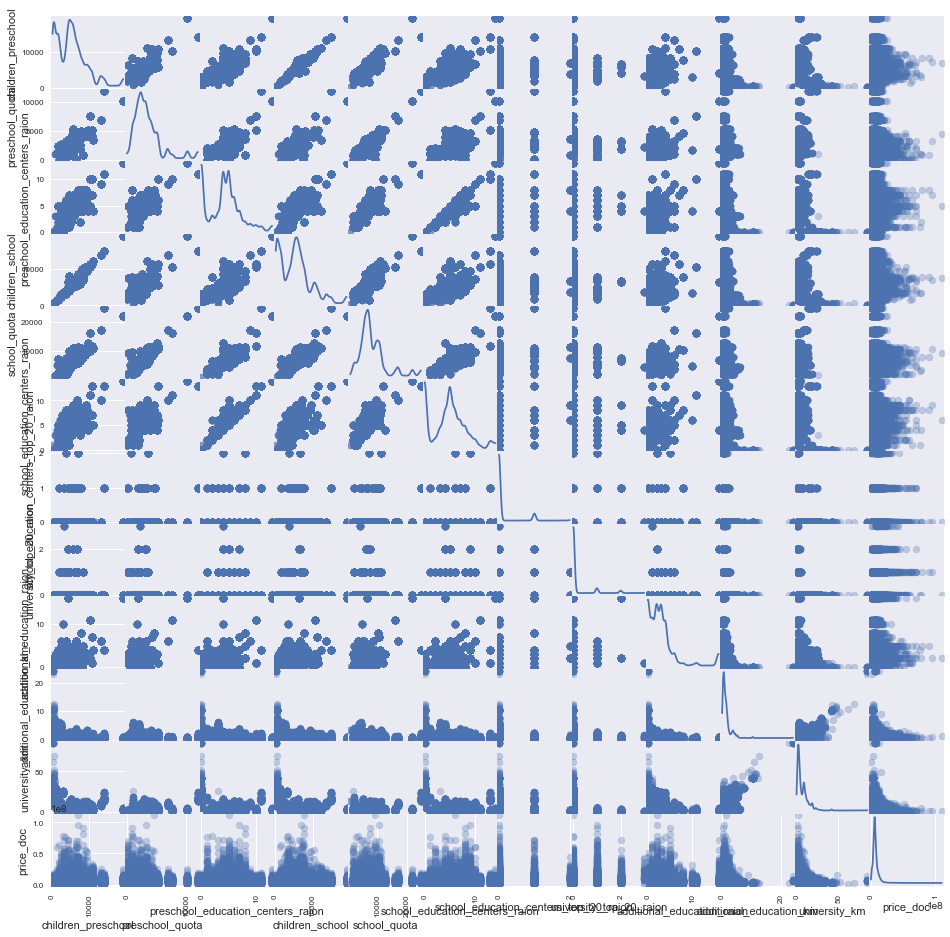

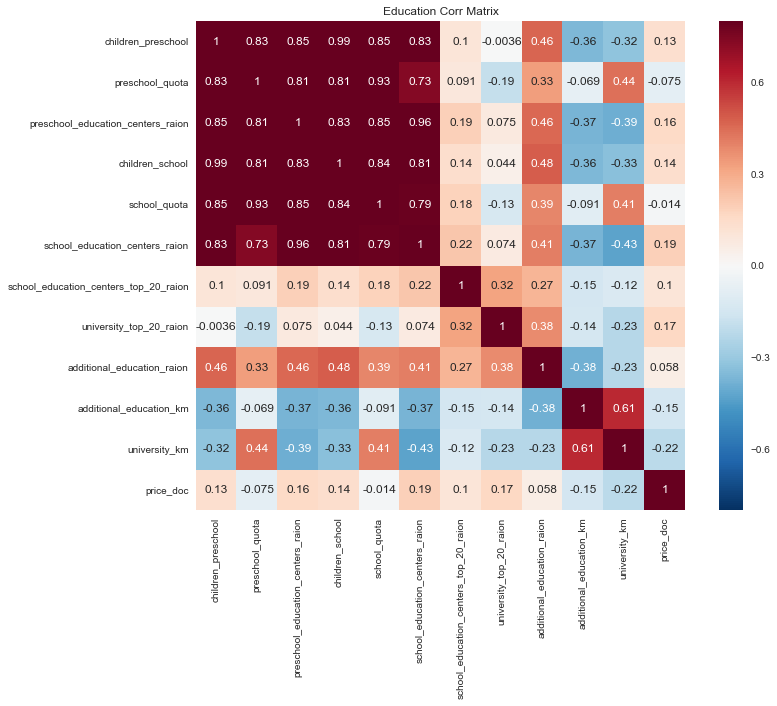

In [12]:
edu_char = train_df[['children_preschool', 'preschool_quota', 'preschool_education_centers_raion',
                  'children_school', 'school_quota', 'school_education_centers_raion', 
                  'school_education_centers_top_20_raion', 'university_top_20_raion',
                  'additional_education_raion', 'additional_education_km', 'university_km',
                  'price_doc']]

corrmat_edu = edu_char.corr()

# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(edu_char, alpha = 0.3,figsize = (16,16), diagonal = 'kde', marker= 'o');

# Create  a matplotlib figure for correlation plot
f2, ax2 = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat_edu, vmax=.8, square=True,annot=True, ax = ax2);
ax2.set_title('Education Corr Matrix')
plt.show()

## Cultural Characteristics

- sport_objects_raion
- culture_objects_top_25_raion
- shopping_centers_raion
- park_km
- fitness_km
- swim_pool_km
- ice_rink_km
- stadium_km
- basketball_km
- shopping_centers_km
- big_church_km
- church_synagogue_km
- mosque_km
- theater_km
- museum_km
- exhibition_km
- catering_km
- price_doc

C:\Continuum\Anaconda3\lib\site-packages\seaborn\matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
C:\Continuum\Anaconda3\lib\site-packages\seaborn\matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


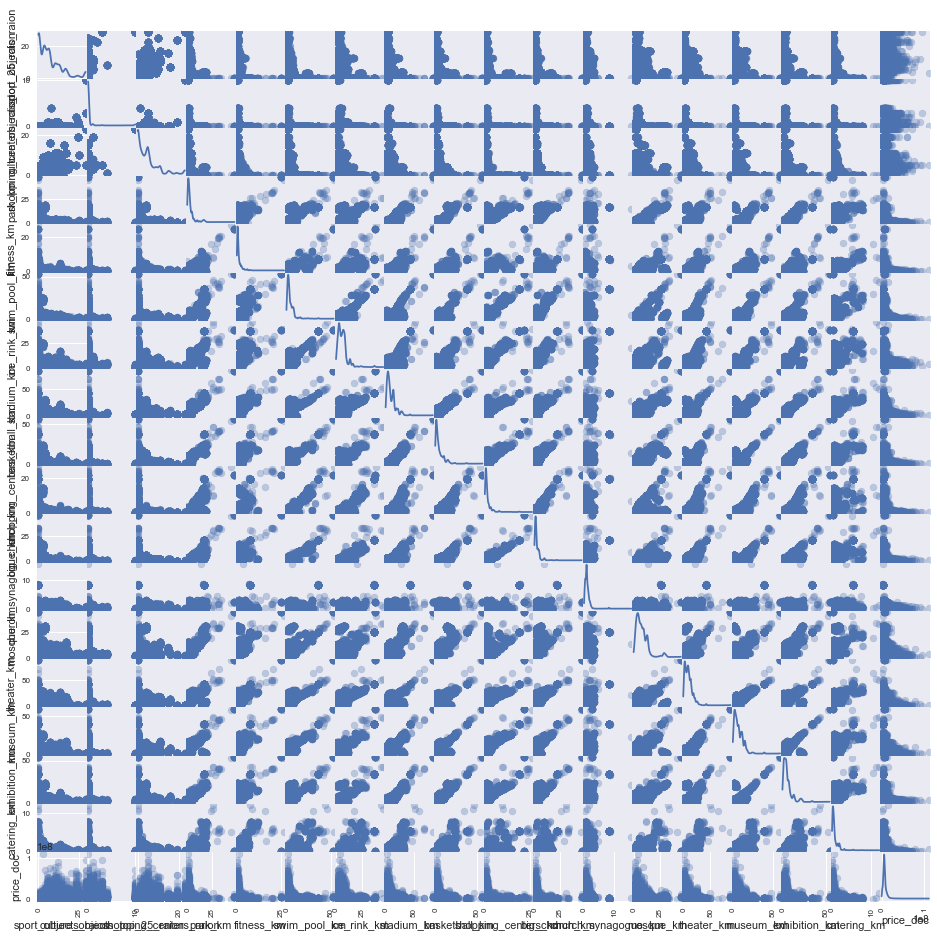

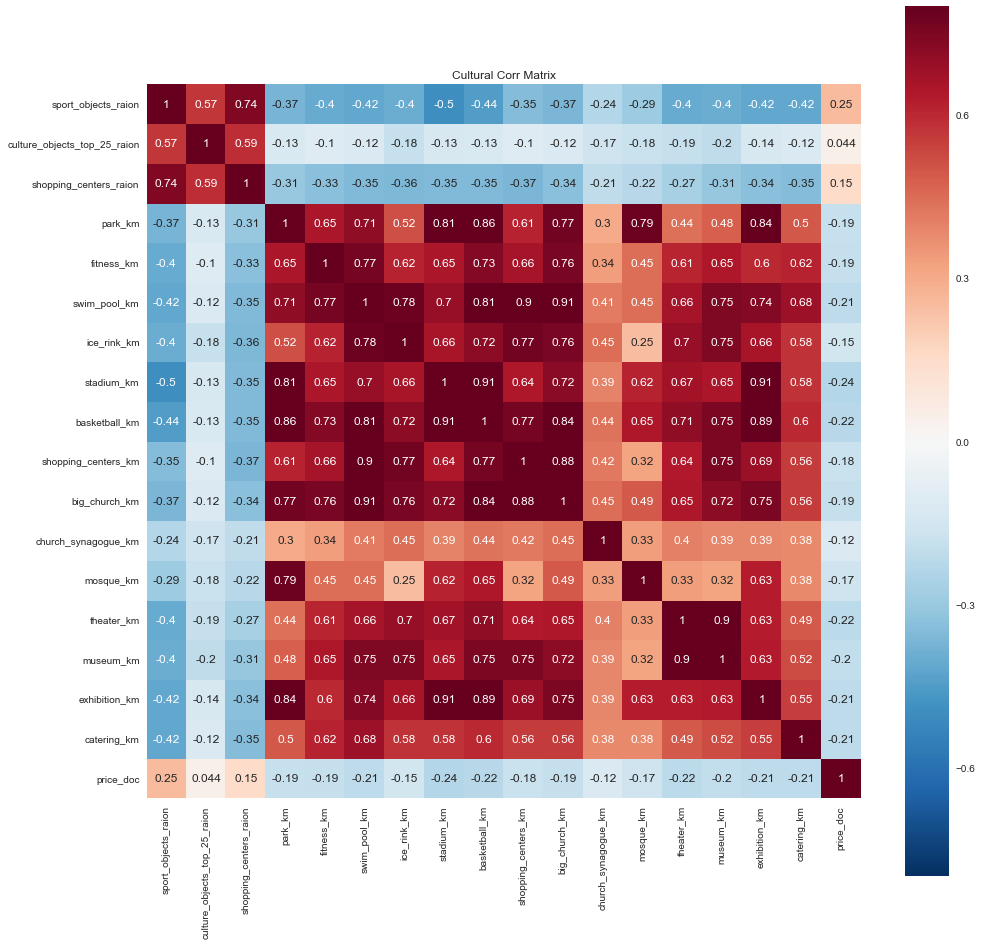

In [13]:
cul_char = train_df[['sport_objects_raion', 'culture_objects_top_25_raion', 'shopping_centers_raion',
              'park_km', 'fitness_km', 'swim_pool_km', 'ice_rink_km','stadium_km', 'basketball_km',
              'shopping_centers_km', 'big_church_km','church_synagogue_km', 'mosque_km', 'theater_km',
              'museum_km', 'exhibition_km', 'catering_km', 'price_doc']]

corrmat_cul = cul_char.corr()
# Produce a scatter matrix for each pair of features in the data

pd.scatter_matrix(cul_char, alpha = 0.3,figsize = (16,16), diagonal = 'kde', marker= 'o');

# Create  a matplotlib figure for correlation plot
f2, ax2 = plt.subplots(figsize=(16,16))

# Draw the heatmap using seaborn
sns.heatmap(corrmat_cul, vmax=.8, square=True,annot=True, ax = ax2);
ax2.set_title('Cultural Corr Matrix')
plt.show()

## Infra Characteristics

- nuclear_reactor_km
- thermal_power_plant_km
- power_transmission_line_km
- incineration_km
- water_treatment_km
- incineration_km
- railroad_station_walk_km
- railroad_station_walk_min
- railroad_station_avto_km
- railroad_station_avto_min
- public_transport_station_km
- public_transport_station_min_walk
- water_km
- mkad_km
- ttk_km
- sadovoe_km
- bulvar_ring_km
- kremlin_km
- price_doc

C:\Continuum\Anaconda3\lib\site-packages\seaborn\matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
C:\Continuum\Anaconda3\lib\site-packages\seaborn\matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


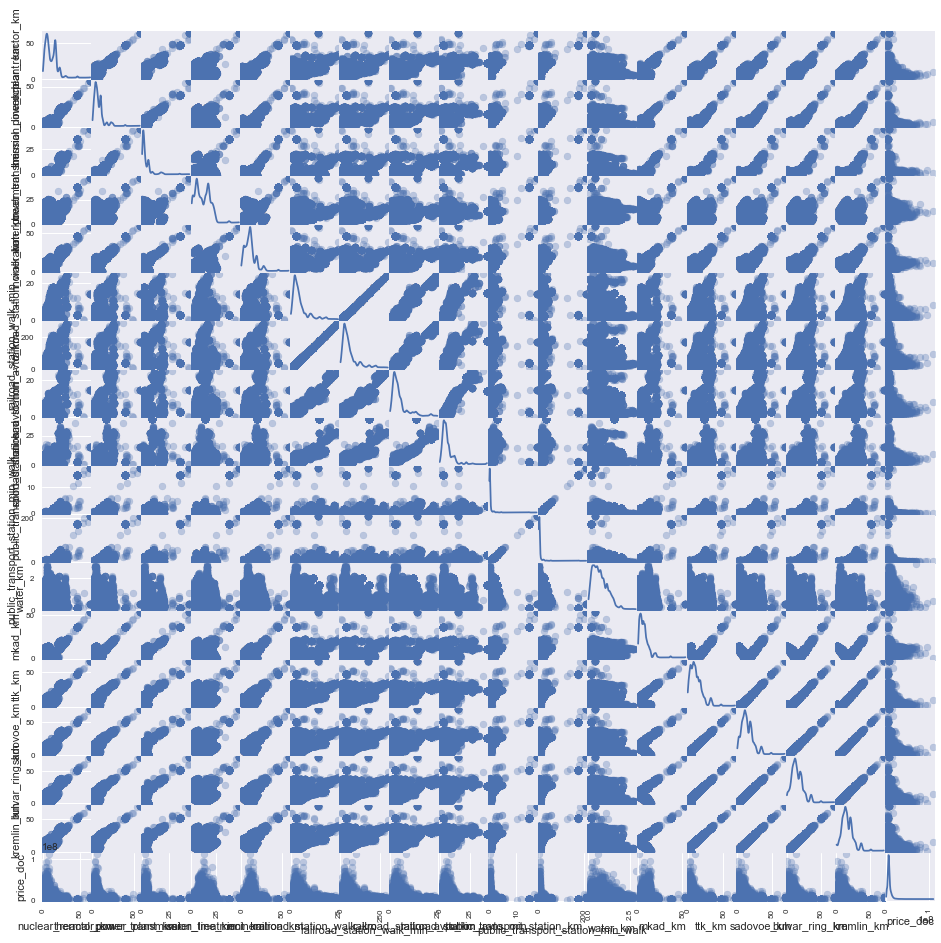

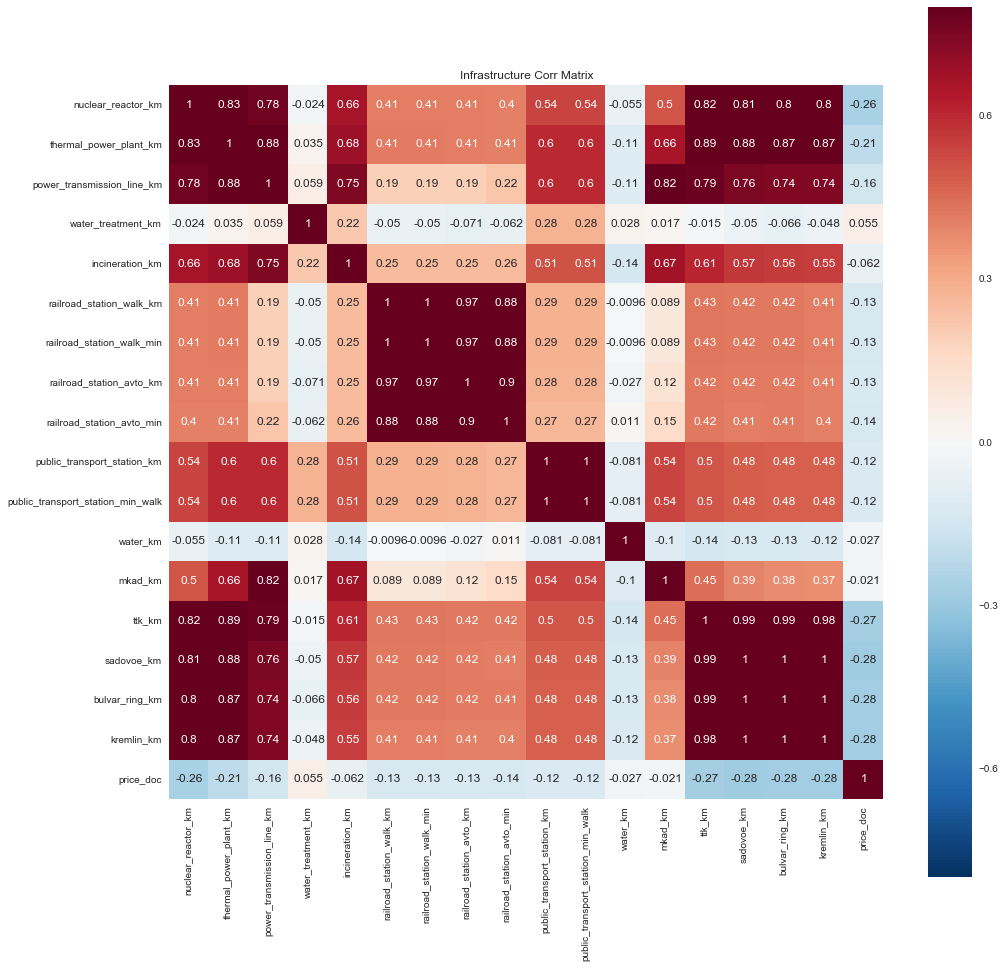

In [14]:
infra_char = train_df[['nuclear_reactor_km','thermal_power_plant_km', 'power_transmission_line_km',
                        'water_treatment_km', 'incineration_km', 'railroad_station_walk_km',
                       'railroad_station_walk_min', 'railroad_station_avto_km', 'railroad_station_avto_min',
                       'public_transport_station_km', 'public_transport_station_min_walk', 'water_km',                         
                       'mkad_km', 'ttk_km', 'sadovoe_km','bulvar_ring_km', 'kremlin_km',
                       'price_doc']]

corrmat_infra = infra_char.corr()

pd.scatter_matrix(infra_char, alpha = 0.3,figsize = (16,16), diagonal = 'kde', marker= 'o');

# Create  a matplotlib figure for correlation plot
f2, ax2 = plt.subplots(figsize=(16, 16))

# Draw the heatmap using seaborn
sns.heatmap(corrmat_infra, vmax=.8, square=True,annot=True, ax = ax2);
ax2.set_title('Infrastructure Corr Matrix')
plt.show()

## Interpretations from the data analysis:

- skewness
- Need to perform transformations
- correlation between the features
- multicolinearity


# Model Evaluation and Performance

In [42]:
# import test data

test_df = pd.read_csv('input/test.csv')

test_df = pd.read_csv("input/test.csv", parse_dates= ["timestamp"])
datatype_df = test_df.dtypes.reset_index()
datatype_df.columns = ["Column", "ColumnType"]
datatype_df.groupby("ColumnType").aggregate('count').reset_index()





,ColumnType,Column
0,int64,159
1,datetime64[ns],1
2,float64,116
3,object,15


In [16]:
train_df.head(n=1)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [17]:
# Data preprocessing and creating of test-train split

# Transforming categorical features for train data
lbl = preprocessing.LabelEncoder()

for col in train_df.columns:
    if train_df[col].dtype == 'object':
        lbl.fit(train_df[col].values)
        train_df[col] = lbl.transform(train_df[col].values)
        
# Training data test-train set preparation 
train_y = train_df.price_doc.values
train_X = train_df.drop(['id', 'timestamp','price_doc'],axis=1)

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size = 0.2, random_state = 0)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape))
print ("Testing set has {} samples.".format(X_test.shape))

Training set has (24376, 289) samples.
Testing set has (6095, 289) samples.


## Prepare the Test set!

fix the '>' issues

In [43]:
# Training data test-train set preparation 
#test_df = test_df.drop(['product_type'],axis=1)

#Preparing test data
for col in test_df.columns:
    if test_df[col].dtype == 'object':
        print(col)
        lbl.fit(test_df[col].values)
        test_df[col] = lbl.transform(test_df[col].values)
        
test_X = test_df.drop(['id', 'timestamp'],axis=1)

product_type


TypeError: '>' not supported between instances of 'str' and 'float'

In [41]:
# Using XGBoost
df_columns = train_X.columns

dtrain_all = xgb.DMatrix(train_X, train_y,feature_names=df_columns)
dtrain = xgb.DMatrix(X_train, y_train,feature_names=df_columns)
dval = xgb.DMatrix(X_test, y_test,feature_names=df_columns)
dtest = xgb.DMatrix(test_X, feature_names=df_columns)

xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 1.0,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

# Uncomment to tune XGB `num_boost_rounds`
partial_model = xgb.train(xgb_params, dtrain, num_boost_round=1000, evals=[(dval, 'val')],
                       early_stopping_rounds=20, verbose_eval=20)

num_boost_round = partial_model.best_iteration

ValueError: feature_names must have the same length as data

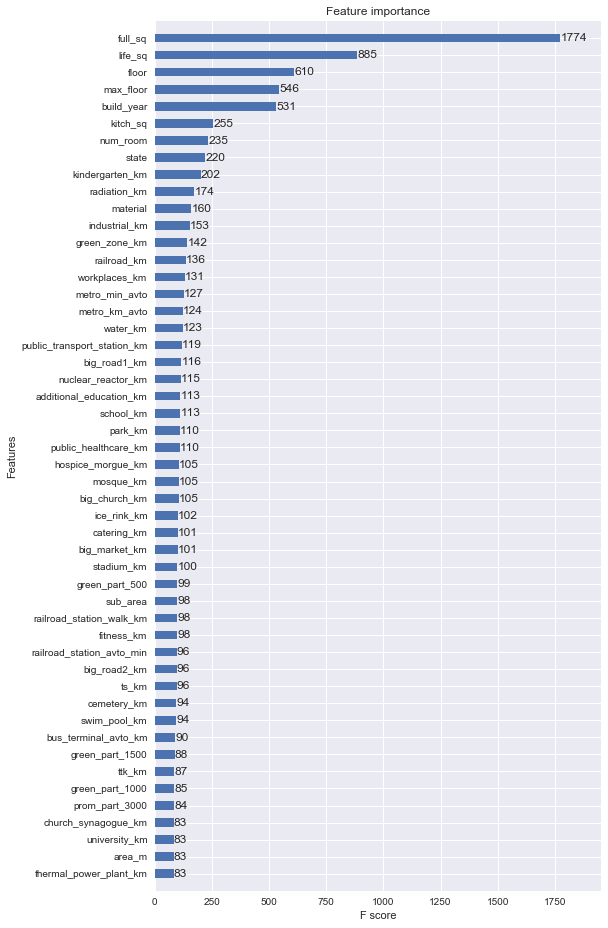

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(8, 16))
xgb.plot_importance(partial_model, max_num_features=50, height=0.5, ax=ax)
plt.show()

In [33]:
num_boost_round = partial_model.best_iteration

In [34]:
model = xgb.train(dict(xgb_params, silent=0), dtrain_all, num_boost_round=num_boost_round)

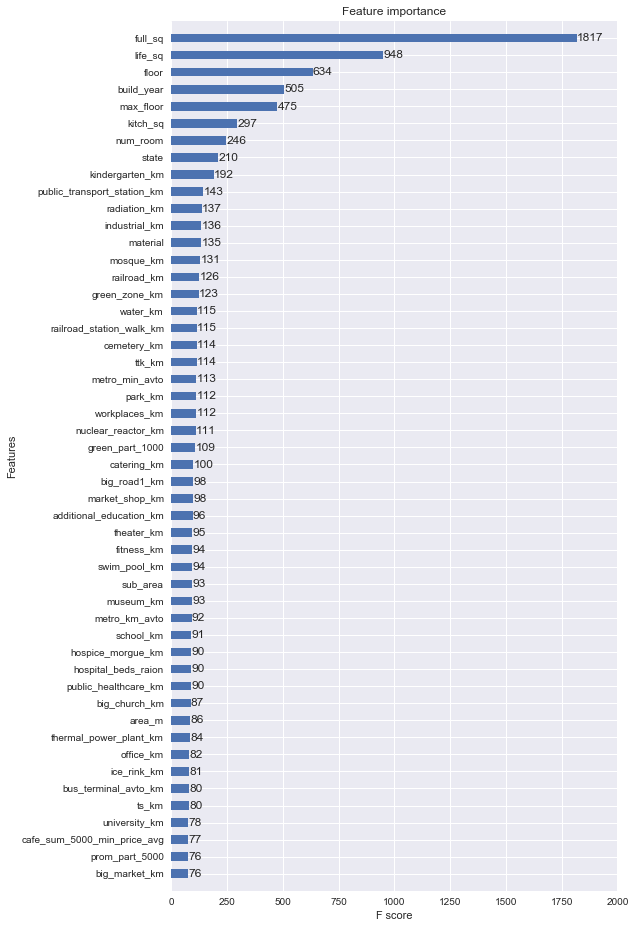

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(8, 16))
xgb.plot_importance(model, max_num_features=50, height=0.5, ax=ax)
plt.show()

In [38]:
ylog_pred = model.predict(test_X)
y_pred = np.exp(ylog_pred) - 1

df_sub = pd.DataFrame({'id': id_test, 'price_doc': y_pred})

df_sub.to_csv('sub.csv', index=False)

AttributeError: 'DataFrame' object has no attribute 'feature_names'